In [114]:
import pandas as pd

In [115]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### Missing values handling 

Some of the columns have more missing values, so we will not conclude this in dataset


In [117]:
data['Bridge Highway Name'].isnull().value_counts()

True     300455
False       243
Name: Bridge Highway Name, dtype: int64

In [118]:
data['Bridge Highway Direction'].isnull().value_counts()

True     300455
False       243
Name: Bridge Highway Direction, dtype: int64

In [119]:
#Single agency..so we will not include in dataset
data['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

In [120]:
# Complaint will be the new dataset
complaint = data[['Unique Key', 'Created Date', 'Closed Date','Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Location','Borough','City', 'Status']]
complaint.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Location,Borough,City,Status
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,"(40.86568153633767, -73.92350095571744)",MANHATTAN,NEW YORK,Closed
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,"(40.775945312321085, -73.91509393898605)",QUEENS,ASTORIA,Closed
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,"(40.870324522111424, -73.88852464418646)",BRONX,BRONX,Closed
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,"(40.83599404683083, -73.82837939584206)",BRONX,BRONX,Closed
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,"(40.733059618956815, -73.87416975810375)",QUEENS,ELMHURST,Closed


### Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)


In [121]:
complaint['Created Date'] = pd.to_datetime(complaint['Created Date'])
print(complaint['Created Date'].head())
print('size of created date is',complaint['Created Date'].size)
complaint['Closed Date'] = pd.to_datetime(complaint['Closed Date'])
print('size of closed date is',complaint['Closed Date'].size)
print(complaint['Closed Date'].head())

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]
size of created date is 300698
size of closed date is 300698
0   2016-01-01 00:55:00
1   2016-01-01 01:26:00
2   2016-01-01 04:51:00
3   2016-01-01 07:43:00
4   2016-01-01 03:24:00
Name: Closed Date, dtype: datetime64[ns]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [122]:
complaint['Request_Closing_Time'] = complaint['Closed Date'] - complaint['Created Date']

complaint['Request_Closing_Time'] = [item.seconds/3600 for item in complaint['Request_Closing_Time']]
    

print('Request closing in hours\n',complaint['Request_Closing_Time'].head())

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Request closing in hours
 0    0.920833
1    1.437778
2    4.858611
3    7.753889
4    3.450556
Name: Request_Closing_Time, dtype: float64


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.


Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64


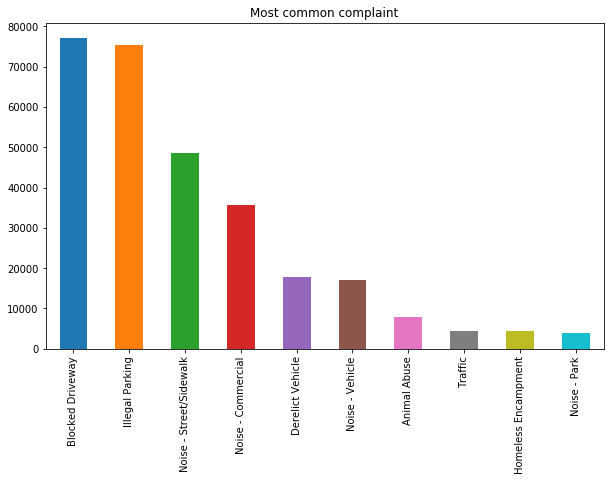

In [123]:
# Most common complaint type
print(complaint['Complaint Type'].value_counts().head(10))
complaint['Complaint Type'].value_counts().head(10).plot(kind='bar',figsize=(10,6),title='Most common complaint')

### Most of the complaint type is Blocked Driveway then illegal parking

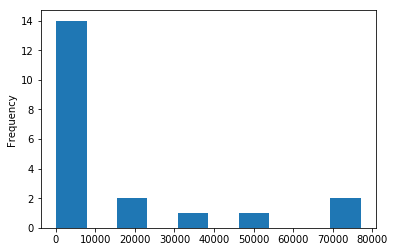

In [124]:
complaint['Complaint Type'].value_counts().head(20).plot(kind='hist')

Max complaint city is           Complaint Type
City                    
BROOKLYN           98307


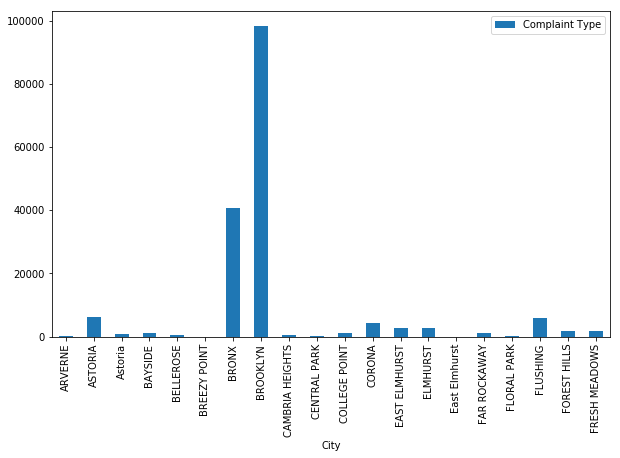

In [125]:
# Which city has more complain

grp_city = complaint[['Complaint Type', 'City']]

complaint_city = grp_city.groupby(['City'])
cnt = complaint_city.count()
print('Max complaint city is',cnt[cnt['Complaint Type'] == cnt['Complaint Type'].max()])
cnt.head(20).plot(kind='bar', figsize=(10,6))

In [126]:
#Check the complaint status

complaint_status = complaint[['Complaint Type', 'Status']]
complaint_status.groupby('Status').count()

,Complaint Type
Status,
Assigned,786
Closed,298471
Draft,2
Open,1439


               Complaint Type
Borough                      
BRONX                   40702
BROOKLYN                98307
MANHATTAN               66131
QUEENS                  80641
STATEN ISLAND           12343
Unspecified              2574


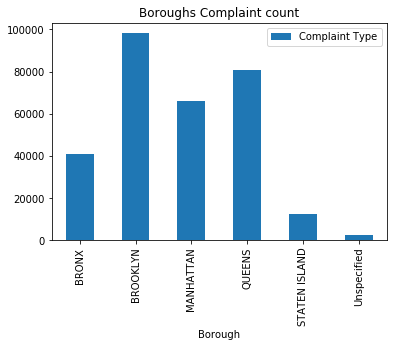

In [127]:
# Locations in Borough with complaint type..which area has maximum complaint
complaint_grp = complaint[['Complaint Type','Borough']]

print(complaint_grp.groupby('Borough').count())
complaint_grp.groupby('Borough').count().plot(kind='bar', title='Boroughs Complaint count')

### Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.


In [140]:
grp_loc = complaint[['Complaint Type', 'City', 'Request_Closing_Time']]
response_grp = grp_loc.groupby(['Complaint Type', 'City']).mean()
print(response_grp)

                                    Request_Closing_Time
Complaint Type City                                     
Animal Abuse   ARVERNE                          2.153626
               ASTORIA                          5.000169
               BAYSIDE                          3.274512
               BELLEROSE                        9.296111
               BREEZY POINT                     2.613472
               BRONX                            6.199099
               BROOKLYN                         4.271103
               CAMBRIA HEIGHTS                  2.628561
               COLLEGE POINT                    4.645159
               CORONA                           3.668251
               EAST ELMHURST                    4.055061
               ELMHURST                         3.871988
               FAR ROCKAWAY                     2.718290
               FLORAL PARK                      2.582361
               FLUSHING                         3.557939
               FOREST HILLS    

In [147]:
from scipy.stats import pearsonr

### Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
       
       1. Whether the average response time across complaint types is similar or not (overall)
       
       2. Are the type of complaint or service requested and location related?


In [178]:
#Test-Strategy average response time across complaint type is not similar
#Null hypothesis: H0 Avg response time across complaint type is not similar
#Alternate hypothesis H1 : Avg response time across complaint type is similar

#Taking 2 complaint type and comparing with pearson..if p-val score is less than 5% then accept H1 else H0
d11 = complaint[complaint['Complaint Type'] == 'Blocked Driveway']['Request_Closing_Time'].tolist()

d12 = complaint[complaint['Complaint Type'] == 'Illegal Parking']['Request_Closing_Time'].tolist()

#Randomly choose 50 samples from each and compare with pearson
pearson_coef, p_val = pearsonr(d11[:50], d12[:50])

if p_val*100 > 5:
    # accept H0
    print('Avg response time across complaint type is not similar, as p-val is higher than 5%')
else:
    print('Avg response time across complaint type is similar, as p-val is lesser')

Avg response time across complaint type is not similar, as p-val is higher than 5%
